In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**1_7_2** \\
Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.

В ответе вы должны указать число кластеров в виде числа (например: 3).

In [61]:
df = pd.read_csv('dataset_209770_6.txt',sep=' ')
df.head()

,x,y
0,1290.577389,1098.484590
1,1092.888076,1414.383440
2,393.274820,281.626388
3,75.016842,703.858132
4,308.411763,410.302659


<Axes: xlabel='x', ylabel='y'>

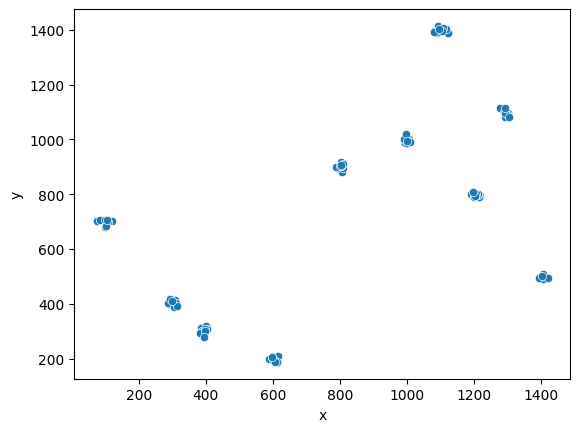

In [63]:
sns.scatterplot(data=df, x='x', y='y')

**1_7_3** \\
Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует скачанным данным.

Чтобы график отображался как на картинках, добавьте

In [67]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col=0)
data.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


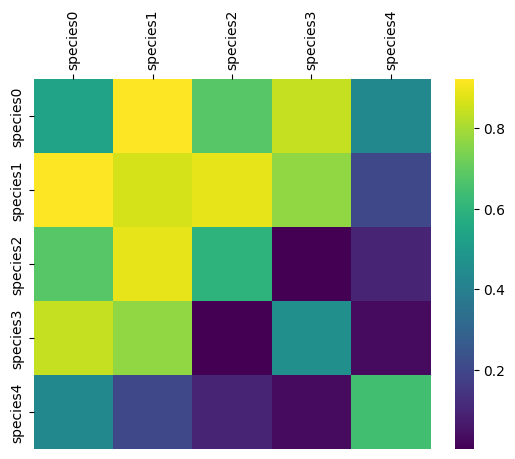

In [68]:
g = sns.heatmap(data=data, cmap="viridis")
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

**1_7_4** \\
Пришло время узнать, ̶кто самый главный рак какая роль в dota самая распространённая. Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

Это задание можно выполнить многими путями, и рисовать гистограмму вообще говоря для этого не нужно.

Данные взяты отсюда, на этом же сайте можно найти больше разнообразных данных по dota 2

In [69]:
dota = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
dota.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [78]:
lens = [len(r.split(',')) for r in dota.roles]
dota['lenths'] = lens

<Axes: >

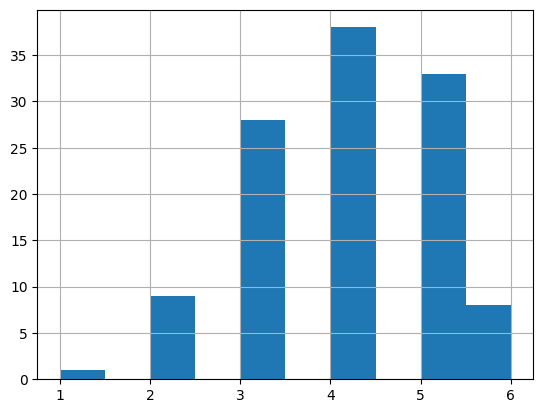

In [80]:
dota['lenths'].hist()

**1_7_5** \\
Теперь перейдём к цветочкам. Магистрантка Адель решила изучить какие бывают ирисы. Помогите Адель узнать об ирисах больше - скачайте датасэт со значениями параметров ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график.

Распределение должно быть по всем образцам, без разделения на вид.
Чтобы построить на 1-ом графике распределения для каждого из параметров, можно воспользоваться петлёй

```
for column in df:
    # Draw distribution with that column
```

Ссылки для изучения: \\
[kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) \\
[distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

In [86]:
flowers = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)
flowers.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: ylabel='Density'>

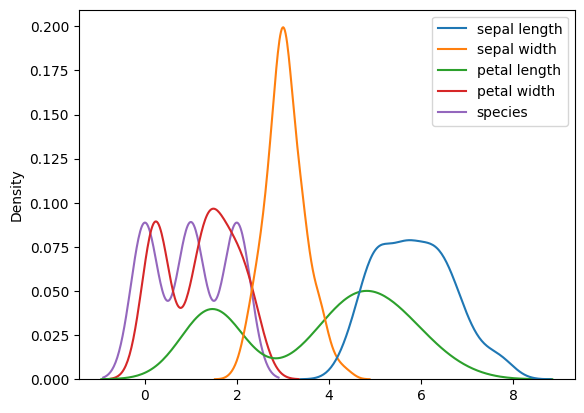

In [87]:
sns.kdeplot(flowers)

**1_7_5** \\
Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violin плотом. Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта с помощью violin плота и выберите правильный (такой же) вариант среди предложенных

<Axes: >

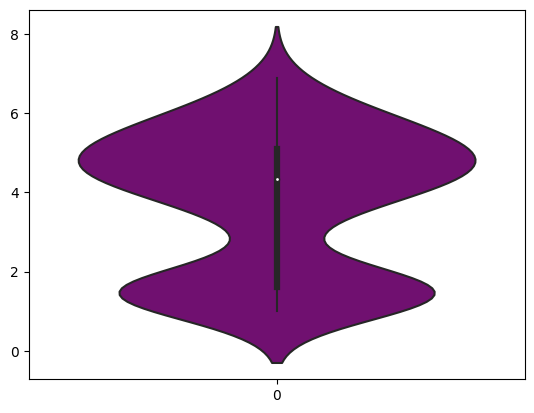

In [89]:
sns.violinplot(flowers['petal length'], color='purple')

**1_7_5** \\
Продолжаем изучение ирисов! Ещё один важный тип графиков - pairplot, отражающий зависимость пар переменных друг от друга, а также распределение каждой из переменных. Постройте его и посмотрите на scatter плоты для каждой из пар фичей. Какая из пар навскидку имеет наибольшую корреляцию?

Также обратите внимание, что можно разделить на группы с помощью параметра hue.

Ссылки для изучения:

[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

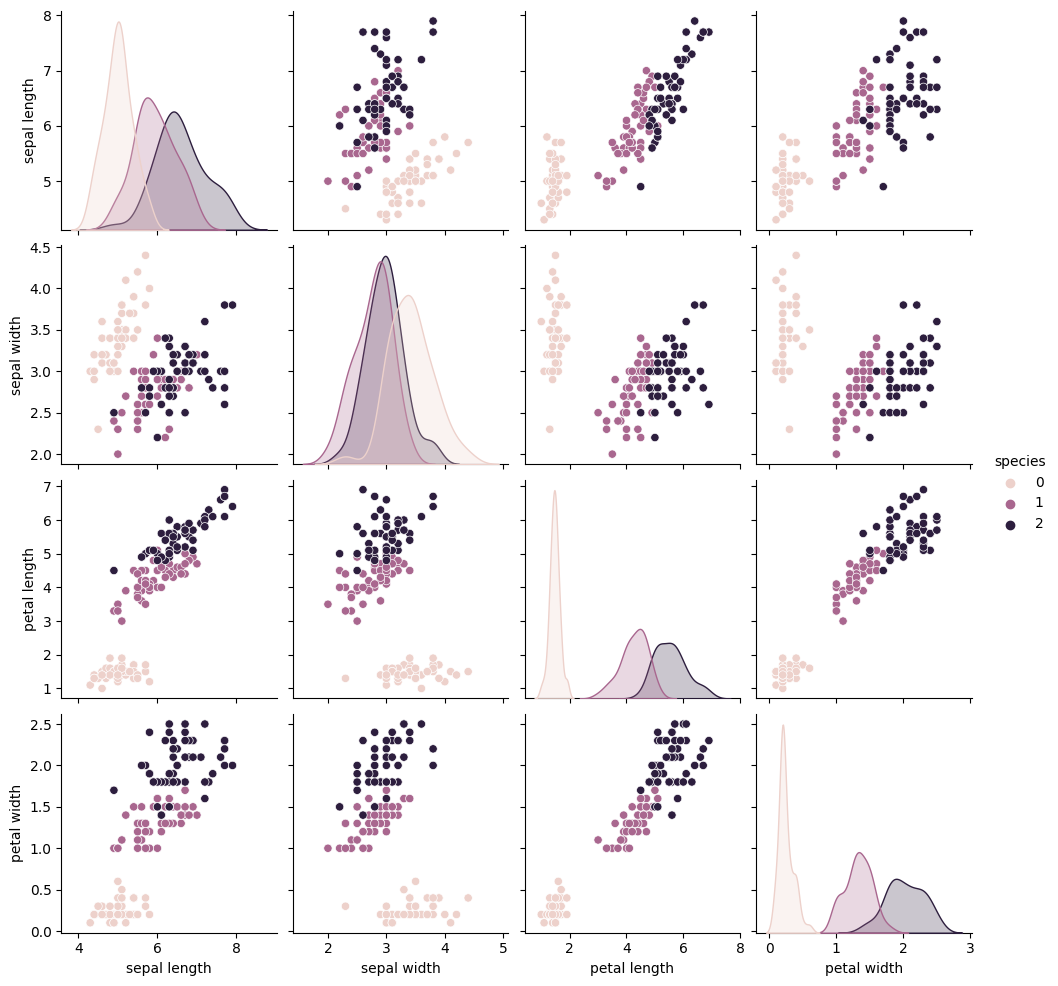

In [93]:
sns.pairplot(data=flowers, hue='species')

In [107]:
corrs = flowers.corr().drop('species')
corrs

,sepal length,sepal width,petal length,petal width,species
sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
